# Importieren benötigter Bibliotheken

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv as csv
from scipy.ndimage import gaussian_filter as g
from scipy.signal import find_peaks

# Wir definieren uns einen Vektor
Samples: $n$

In [25]:
n = 128
x = np.arange(0,n)
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]


# Wir wollen die Sinus-Funktion zeichnen
## Was ist die Bedeutung von f?
## Wie verändert sich die Schwingung im Vergleich von
## $f = \frac{1}{n-1}\cdot 20$  zu $f = \frac{1}{n-1}\cdot10$
## und $f = \frac{1}{n-1}\cdot 20$ zu $f = \frac{1}{n-1}\cdot 1$

0.15748031496062992


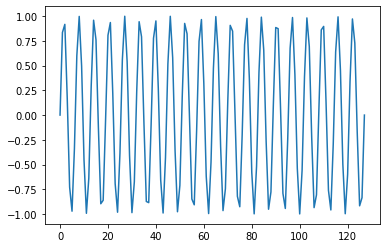

In [58]:
f = 1/(n-1)*20
y = np.sin(2*np.pi*f*x)
print(f)
plt.plot(x,y)

# Wir berechnen 
## die Fouriertransformation, die Frequenzachse
# Und zeichen real- und imaginärteil

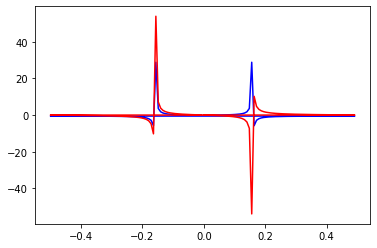

In [62]:
sp = np.fft.fft(y)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(freq, sp.real,'-b', freq, sp.imag,'-r')

Wie sieht die Fouriertransformation von $y = \sin(2\cdot\pi\cdot f\cdot x) + \sin(2\cdot\pi\cdot2 \cdot f\cdot x)$ aus ?

# Wir lesen eine Datei im CSV-Format ein

In [4]:
with open(r'SampleData/revolution-sample-data/ECG/SampleECG_wHeader.txt',newline='') as csvfile:
    raw_data = csv.reader(csvfile, delimiter='\t', quotechar='"')
    header = next(raw_data)
    data = dict()
    for t in header:
        data[t] = list()
    for row in raw_data:
        for index, t in enumerate(header):
            data[t].append(row[index])
        

In [5]:
print(header)

['nSeq', 'I1', 'I2', 'O1', 'O2', 'A2']


In [6]:
print(len(data['A2']))

22350


# Wir plotten die Daten
# Was sehen wir?

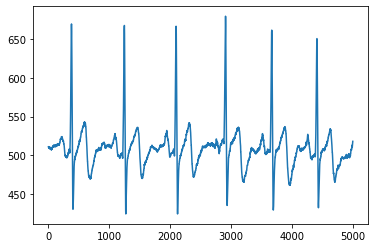

In [9]:
x0 = -9000
samples = 5000
ecg = np.array(data['A2'][x0:(x0+samples)]).astype('float')
plt.plot(ecg)

# Wir benutzen jetzt die Funktion g, die wir importiert haben.
# Was macht g ?
# Wie ändert sich die Ausgabe, wenn ich $\sigma$ größer oder kleiner mache?

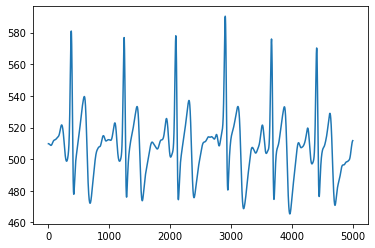

In [10]:
plt.plot(g(ecg, sigma=15))

# Wir benutzen jetzt eine Funktion zum finden der Maxima
## variieren Sie den parameter prominence so, dass Sie nur noch die 'R'-Zacken finden
Tipp: schauen Sie nach unter
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

[  2.   2.  17.   5. 173.  74.  74.   8.   5.   2.  32.   7. 238.  66.
   9.   2.  34.   9. 243.  70.  70.   7.   7.   7.   7.   7.   7.   7.
   3.  19.   6. 251.  71.  71.  71.   8.  27. 227.  76.   7.   7.   7.
   7.  33. 219.   2.  69.  69.   5.   5.] [ 11.          11.5         65.          14.          21.34230769
 160.         160.          46.          18.          10.
  79.          30.75        26.23076923 180.          62.
  10.          65.          23.          27.36607143 150.
 150.          51.          51.          51.          33.
  33.          33.          33.          16.          44.
  22.          28.22222222 193.33333333 193.33333333 193.33333333
  45.          54.75        26.56043956 193.          38.
  38.          38.          38.          74.25        27.125
  11.         189.         189.          18.          14.        ]


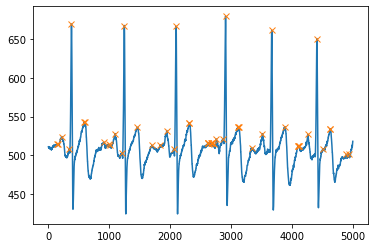

In [12]:
peaks, properties = find_peaks(ecg, prominence=1, width=10)
print(properties["prominences"], properties["widths"])
plt.plot(ecg)
plt.plot(peaks, ecg[peaks], "x")

In [13]:
print(peaks)

[ 137  160  219  342  378  591  594  913  993 1017 1094 1205 1247 1463
 1701 1837 1944 2056 2096 2313 2315 2614 2620 2622 2676 2680 2684 2687
 2720 2757 2867 2909 3115 3121 3123 3338 3516 3668 3884 4099 4106 4111
 4115 4259 4410 4516 4625 4631 4893 4933]


# Was macht folgender Ausdruck ?

In [23]:
[peaks[i] -peaks[i-1] for i in range(1, len(peaks))]

[869, 849, 813, 759, 742]